# WeatherPy
----

#### Note
* Observations and Analysis have been scattered throughout the script, but well labeled

In [1]:
import datetime

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
import sys
import os
from scipy.stats import linregress
from pprint import pprint

# Import API key
sys.path.append("..")
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = os.path.join("output_data", "cities.csv")

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

1. What is Citipy for? 
    * Citipy is used to generate a list of city names, picking a city near the given coordinates that meet the requested criteria
1. Why would you use it in conjunction with the OpenWeatherMap API? 
    * Needed: A random list of cities that are big enough to be included in a set of data
    * Issue: A random number genrator is not likely to generate exact coordinates of a city that will meet the size criteria
1. How would you do so?
    * Citypy can receive parameters that include latitude, longitude, & city size and return a city name that meets the needed criteria nearest the given coordinates

In [3]:
# Lists for holding lat_lngs and cities
lat_lngs = []
cities = []

# Setting a seed for the random number generator, so I end up with the same numbers every time I run the script
np.random.seed(1234)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count (500+)
len(cities)

608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Create the base url used for the chosen API, including user API key
base_url = f'http://api.openweathermap.org/data/2.5/weather?&APPID={weather_api_key}&units=imperial&q='

# Code used when trying to get the code working for a single city (before creating the loop for all the cities)
# city = cities[0]

# Creating an empty DataFrame to hold the information from the API calls
data_df = pd.DataFrame(columns=['City','Latitude','Longitude','Max Temp(F)',
                                    'Humidity(%)','Cloudiness(%)','Wind Speed (mph)','Country','Date'])

# Indicate the begining of the API calls
print('Beginning Data Retrieval')
print('------------------------')

# Initialize a counter used while processing all the cities
i = 1

# Loop through all the cities in the list
for city in cities:
    # Indicate which city is being processed
    print(f'Processing city {i} | {city}')
    
    # Using try in case a city name from my list does not exist in the API data
    try:
        # Making the actual API call to retrieve the data
        response_json = requests.get(base_url + city).json()
        
#         Code used when trying to get the code working for a single city (before creating the loop for all the cities)
#         pprint(response_json)

        # Adding the data from the API response to the DataFrame created above
        data_df = data_df.append({'City':response_json['name'],
                                  'Latitude':response_json['coord']['lat'],
                                  'Longitude':response_json['coord']['lon'],
                                  'Max Temp(F)':response_json['main']['temp_max'],
                                  'Humidity(%)':response_json['main']['humidity'],
                                  'Cloudiness(%)':response_json['clouds']['all'],
                                  'Wind Speed (mph)':response_json['wind']['speed'],
                                  'Country':response_json['sys']['country'],
                                  'Date':response_json['dt']
                                 }, ignore_index=True)
    # If data is not found for the current city, inform the user that the city was not found and move on to the next city
    except KeyError:
        print(f'City not found.  Skipping...')
        pass
    
    # increase the counter by one
    i+=1

Beginning Data Retrieval
------------------------
Processing city 1 | rikitea
Processing city 2 | yunjinghong
City not found.  Skipping...
Processing city 3 | samusu
City not found.  Skipping...
Processing city 4 | provideniya
Processing city 5 | havre-saint-pierre
Processing city 6 | cape town
Processing city 7 | tsihombe
City not found.  Skipping...
Processing city 8 | chumikan
Processing city 9 | belushya guba
City not found.  Skipping...
Processing city 10 | lavrentiya
Processing city 11 | bambous virieux
Processing city 12 | biak
Processing city 13 | lasa
Processing city 14 | shelbyville
Processing city 15 | jamestown
Processing city 16 | atuona
Processing city 17 | garissa
Processing city 18 | taolanaro
City not found.  Skipping...
Processing city 19 | kodiak
Processing city 20 | tasiilaq
Processing city 21 | henties bay
Processing city 22 | dongli
Processing city 23 | mataura
Processing city 24 | havoysund
Processing city 25 | awbari
Processing city 26 | dobryanka
Processing cit

Processing city 243 | qaqortoq
Processing city 244 | saint-leu
Processing city 245 | matara
Processing city 246 | jawa
Processing city 247 | kuchera
Processing city 248 | upernavik
Processing city 249 | ponta delgada
Processing city 250 | plaster rock
Processing city 251 | mufumbwe
Processing city 252 | kaitangata
Processing city 253 | victoria
Processing city 254 | bargal
City not found.  Skipping...
Processing city 255 | oussouye
Processing city 256 | khani
Processing city 257 | karakendzha
City not found.  Skipping...
Processing city 258 | tongchuan
Processing city 259 | te anau
Processing city 260 | wattegama
Processing city 261 | port augusta
Processing city 262 | marsa matruh
Processing city 263 | san patricio
Processing city 264 | inuvik
Processing city 265 | ulaangom
Processing city 266 | pangkalanbuun
Processing city 267 | port hardy
Processing city 268 | lata
Processing city 269 | qunduz
Processing city 270 | pecos
Processing city 271 | grand river south east
City not found. 

City not found.  Skipping...
Processing city 486 | karia
Processing city 487 | west wendover
Processing city 488 | los llanos de aridane
Processing city 489 | lieksa
Processing city 490 | mount pleasant
Processing city 491 | khromtau
Processing city 492 | tocopilla
Processing city 493 | baringo
Processing city 494 | makungu
Processing city 495 | jacareacanga
Processing city 496 | skvyra
Processing city 497 | zaragoza
Processing city 498 | petrolandia
City not found.  Skipping...
Processing city 499 | santa lucia
Processing city 500 | novogornyy
Processing city 501 | denpasar
Processing city 502 | ayan
Processing city 503 | kushnarenkovo
Processing city 504 | lazaro cardenas
Processing city 505 | syava
Processing city 506 | ishigaki
Processing city 507 | pokrovsk-uralskiy
City not found.  Skipping...
Processing city 508 | bara
Processing city 509 | sao joao dos patos
Processing city 510 | panguna
Processing city 511 | maymyo
Processing city 512 | dickinson
Processing city 513 | tanabe
P

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Open the csv file for writing
with open(output_data_file, 'w', encoding='utf-8', newline='\n') as csvfile:

    # write the DataFrame data to the csv file
    data_df.to_csv(csvfile, index=False)

# Close the csv file
csvfile.close()

In [7]:
# Open the csv file for reading
with open(output_data_file, 'r', encoding='utf-8') as read_file:
    
    # read the data back into the DataFrame from the csv file
    data_df = pd.read_csv(read_file, na_filter = False)

In [9]:
# Show how many rows contain data for each column, all values should be the same, otherwise there is missing data and those
# entries should be removed
data_df.count()

City                559
Latitude            559
Longitude           559
Max Temp(F)         559
Humidity(%)         559
Cloudiness(%)       559
Wind Speed (mph)    559
Country             559
Date                559
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
# Get the standard statistics values for each column to help determine if there are humidity values over 100%
data_df.describe()

,Latitude,Longitude,Max Temp(F),Humidity(%),Cloudiness(%),Wind Speed (mph),Date
count,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,5.590000e+02
mean,21.501449,18.520984,69.980894,68.339893,48.180680,8.331055,1.593538e+09
std,32.773909,90.031091,15.300210,21.379294,36.364659,5.851806,4.945591e+01
min,-54.800000,-179.170000,30.200000,1.000000,0.000000,0.380000,1.593538e+09
25%,-4.235000,-59.590000,58.740000,57.000000,15.000000,4.140000,1.593538e+09
50%,26.250000,24.730000,72.730000,73.000000,40.000000,6.710000,1.593538e+09
75%,49.850000,96.110000,80.600000,83.000000,83.000000,11.020000,1.593538e+09
max,78.220000,179.320000,111.130000,100.000000,100.000000,33.080000,1.593538e+09


#### max humidity is 100%, therefore, I am skipping the part that removes those entries

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [38]:
# Convert the date from a Unix format to a readable format for the chart title
data_df['Format_Date'] = pd.to_datetime(data_df['Date'],unit='s')

# Pull parts of date and reformat date to desired look
date = datetime.datetime.strptime(str(data_df['Format_Date'][0]), '%Y-%m-%d %H:%M:%S')
dateFormatted = date.strftime("%m/%d/%y")

# Set the x axis to the Latitude for the following graphs
x_values = data_df['Latitude']

## Latitude vs. Temperature Plot

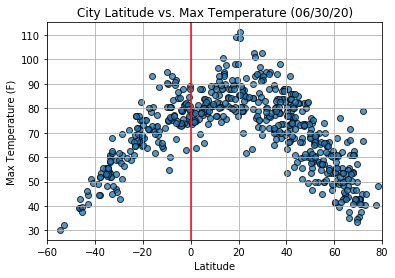

In [43]:
# Create titles and labels for graph
plt.title(f'City Latitude vs. Max Temperature ({dateFormatted})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

# Set limits and turn on grid
plt.xlim([-60,80])
plt.grid()

# Draw a vertical line representing the equator
plt.axvline(x=0, ymin=0, ymax=data_df['Max Temp(F)'].max(), color='r')

# Generate the scatter plot showing all the maximum temperatures of the cities vs. their latitudinal position
plt.scatter(x_values,data_df['Max Temp(F)'], edgecolors='black', alpha=0.75)
plt.savefig('output_data/lat_temp_plot.png')
plt.show()

#### Observations & Analysis
* The Latitude = 0 line represents the equator
* There is a clear pattern of maximum temperature increase as the values approach the equator
* I did notice that the highest temperatures are actually around the 20 degree latitude mark.  
    * This could be accounted for by the earth's tilted axis.  
        * As the earth revolves around the sun, 
            * cities slightly north of the equator would be exposed to the sun for longer in certain months of the year 
            * cities slightly south of the equator would be exposed to the sun for longer in opposite months of the year
    * If you created this same chart for every day of the year, I hypothesize that the highest temperatures would slowly swing from one side of the equator to the other and then return back and this pattern would repeat year after year

## Latitude vs. Humidity Plot

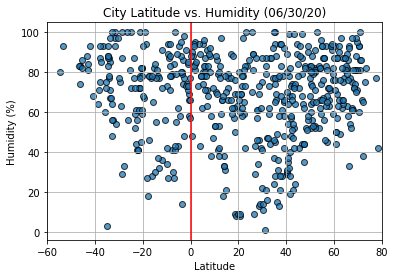

In [44]:
# Create titles and labels for graph
plt.title(f'City Latitude vs. Humidity ({dateFormatted})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Set limits and turn on grid
plt.xlim([-60,80])
plt.grid()

# Draw a vertical line representing the equator
plt.axvline(x=0, ymin=0, ymax=data_df['Max Temp(F)'].max(), color='r')

# Generate the scatter plot showing all the humidity of the cities vs. their latitudinal position
plt.scatter(x_values,data_df['Humidity(%)'], edgecolors='black', alpha=0.75)
plt.savefig('output_data/lat_humid_plot.png')
plt.show()

#### Observations & Analysis
* The Latitude = 0 line represents the equator
* There does not appear to be any relationship of the humidity level and the distance from the equator

## Latitude vs. Cloudiness Plot

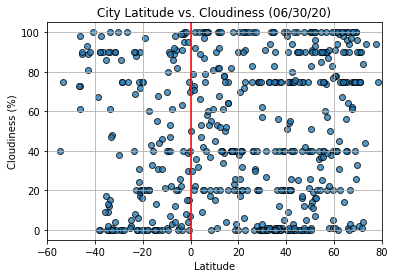

In [45]:
# Create titles and labels for graph
plt.title(f'City Latitude vs. Cloudiness ({dateFormatted})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Set limits and turn on grid
plt.xlim([-60,80])
plt.grid()

# Draw a vertical line representing the equator
plt.axvline(x=0, ymin=0, ymax=data_df['Max Temp(F)'].max(), color='r')

# Generate the scatter plot showing all the cloudiness of the cities vs. their latitudinal position
plt.scatter(x_values,data_df['Cloudiness(%)'], edgecolors='black', alpha=0.75)
plt.savefig('output_data/lat_cloud_plot.png')
plt.show()

#### Observations & Analysis
* The Latitude = 0 line represents the equator
* There does not appear to be any relationship of the clodiness level and the distance from the equator
* There does appear to be certain values that are used more often when ranking the cloudiness level (0, 20, 40, 75, 90, 100)
    * This is indicated by what appears to be horizontal lines forming at those cloudiness values

## Latitude vs. Wind Speed Plot

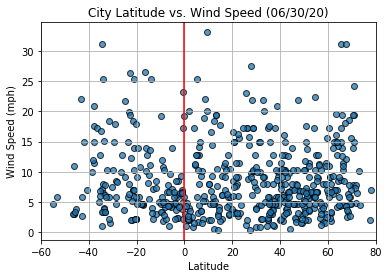

In [46]:
# Create titles and labels for graph
plt.title(f'City Latitude vs. Wind Speed ({dateFormatted})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Set limits and turn on grid
plt.xlim([-60,80])
plt.grid()

# Draw a vertical line representing the equator
plt.axvline(x=0, ymin=0, ymax=data_df['Max Temp(F)'].max(), color='r')

# Generate the scatter plot showing all the wind speeds of the cities vs. their latitudinal position
plt.scatter(x_values,data_df['Wind Speed (mph)'], edgecolors='black', alpha=0.75)
plt.savefig('output_data/lat_wind_plot.png')
plt.show()

#### Observations & Analysis
* The Latitude = 0 line represents the equator
* There does not appear to be any relationship of the wind speed and the distance from the equator

## Linear Regression

In [17]:
# OPTIONAL: Create a function to create Linear Regression plots
# This functions creates a linear regression plot using the parameters passed to it
# Parameters are defined as follows:
#     x_values = a list holding the values used as the x values of each coordinate point (same length as y_values)
#     y_values = a list holding the values used as the y values of each coordinate point (same length as x_values)
#     x_label = a string containing the label for the x-axis
#     y_label = a string containing the label for the y-axis
#     x_limits = a list containing two values [x_min, x_max]
#     x_eq_loc = an integer representing the x location of the begining of the equation for the line of regression
#     y_eq_loc = an integer representing the y location of the begining of the equation for the line of regression
def lin_regress_plot(x_values, y_values, x_label, y_label, x_limits, x_eq_loc, y_eq_loc):
    # Create labels for graph
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    # Set limits
    plt.xlim(x_limits)

    # Generate the scatter plot
    plt.scatter(x_values, y_values, alpha=1)
    
    # Calculate the linear regression values
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    
    # Create the string holding the linear regression equation
    temp_fit_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'
    
    # Display the r-squared value
    print(f'The r-squared is: {r_value**2}')
    
    # Calculate the values & plot the linear regression equation
    temp_fit = slope * x_values + intercept
    plt.plot(x_values, temp_fit, color='r')
    
    # Add the linear regression equation string to the figure
    plt.annotate(temp_fit_eq, (x_eq_loc,y_eq_loc), color='r', fontsize=14)
    plt.show()

In [18]:
# Create Northern and Southern Hemisphere DataFrames
NH_data_df = data_df.loc[data_df['Latitude'] >= 0]
SH_data_df = data_df.loc[data_df['Latitude'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5553557471788206


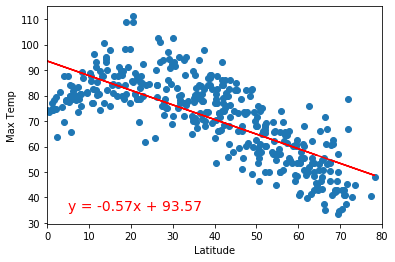

In [19]:
# Call the linear regression plot function to compare latitude and Max Temperature in the Northern Hemishere
lin_regress_plot(NH_data_df['Latitude'], NH_data_df['Max Temp(F)'], 'Latitude', 'Max Temp', [0,80], 5, 35)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7418829153659556


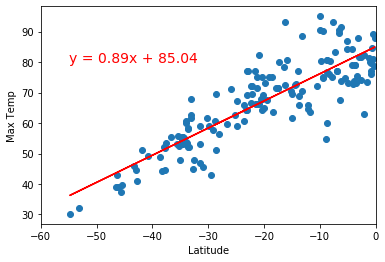

In [42]:
# Call the linear regression plot function to compare latitude and Max Temperature in the Southern Hemishere
lin_regress_plot(SH_data_df['Latitude'], SH_data_df['Max Temp(F)'], 'Latitude', 'Max Temp', [-60,0], -55, 80)

### Observations & Analysis for Graphs above
* The Northern Hemishpere maximum temperatures seem to have a moderate negative correlation with the latitudinal postion
* The Southern Hemishpere maximum temperatures seem to have a stronger positive correlation with the latitudinal postion
    * The different in strength of the correlation is related to the tilted axis hypothesis proferred above
    * The strength of the correlation is based on the r-squared value

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.012703869256445677


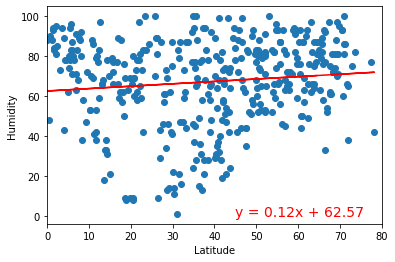

In [21]:
# Call the linear regression plot function to compare latitude and Humidity in the Northern Hemishere
lin_regress_plot(NH_data_df['Latitude'], NH_data_df['Humidity(%)'], 'Latitude', 'Humidity', [0,80], 45, 0)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0326276465597976


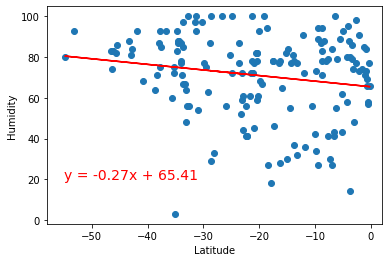

In [22]:
# Call the linear regression plot function to compare latitude and Humidity in the Southern Hemishere
lin_regress_plot(SH_data_df['Latitude'], SH_data_df['Humidity(%)'], 'Latitude', 'Humidity', [-58,2], -55, 20)

### Observations & Analysis for Graphs above
* The Northern Hemishpere maximum temperatures seem to have a very weak positive correlation with the latitudinal postion
* The Southern Hemishpere maximum temperatures seem to have a very weak negative correlation with the latitudinal postion

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0065489121044554205


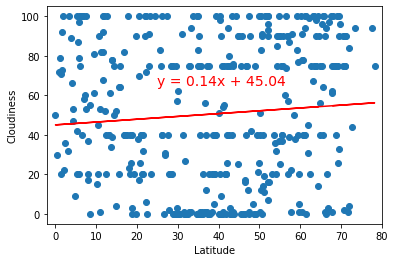

In [28]:
# Call the linear regression plot function to compare latitude and cloudiness in the Northern Hemishere
lin_regress_plot(NH_data_df['Latitude'], NH_data_df['Cloudiness(%)'], 'Latitude', 'Cloudiness', [-2,80], 25, 65)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.012083127458306182


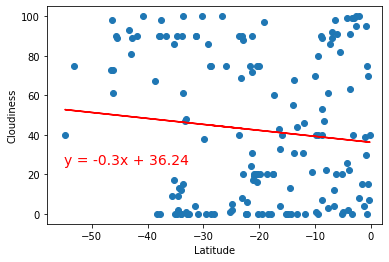

In [29]:
# Call the linear regression plot function to compare latitude and cloudiness in the Southern Hemishere
lin_regress_plot(SH_data_df['Latitude'], SH_data_df['Cloudiness(%)'], 'Latitude', 'Cloudiness', [-58,2], -55, 25)

### Observations & Analysis for Graphs above
* The Northern Hemishpere maximum temperatures seem to have a very weak positive correlation with the latitudinal postion
* The Southern Hemishpere maximum temperatures seem to have a very weak negative correlation with the latitudinal postion

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0018936868211386004


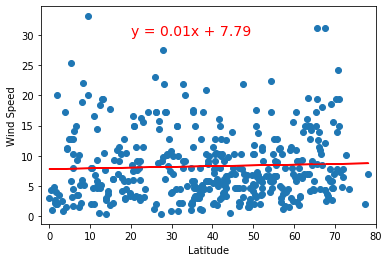

In [30]:
# Call the linear regression plot function to compare latitude and wind speed in the Northern Hemishere
lin_regress_plot(NH_data_df['Latitude'], NH_data_df['Wind Speed (mph)'], 'Latitude', 'Wind Speed', [-2,80], 20, 30)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.017339447999822042


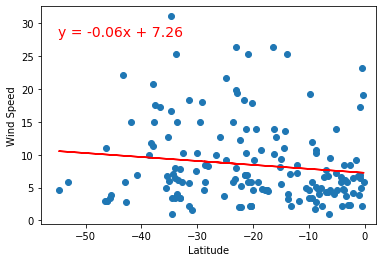

In [40]:
# Call the linear regression plot function to compare latitude and wind speed in the Southern Hemishere
lin_regress_plot(SH_data_df['Latitude'], SH_data_df['Wind Speed (mph)'], 'Latitude', 'Wind Speed', [-58,2], -55, 28)

### Observations & Analysis for Graphs above
* The Northern Hemishpere maximum temperatures seem to have a very weak positive correlation with the latitudinal postion
* The Southern Hemishpere maximum temperatures seem to have a very weak negative correlation with the latitudinal postion